In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
spam = pd.read_csv('datasets/spam.csv')
spam

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
spam.shape 

(5572, 2)

In [7]:
spam.columns

Index(['Label', 'EmailText'], dtype='object')

In [8]:
spam.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
spam['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

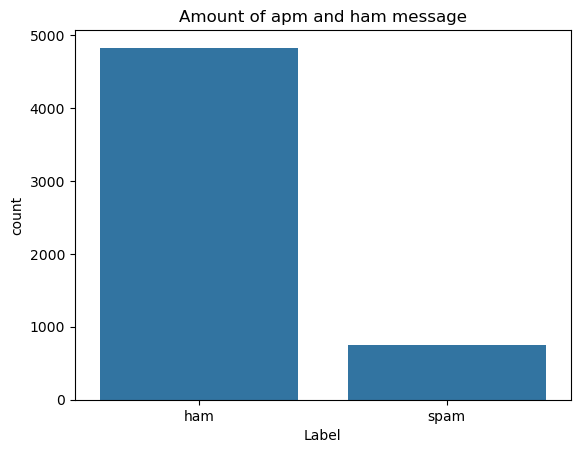

In [15]:
sns.countplot(data = spam,x=spam['Label']).set_title("Amount of apm and ham message")
plt.show()

/tmp/ipykernel_11293/3998433492.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(spam.Label,sort=True)
/tmp/ipykernel_11293/3998433492.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size = [count_class[0],count_class[1]]


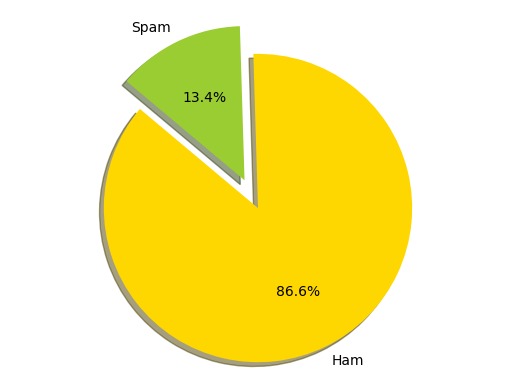

In [17]:
count_class = pd.value_counts(spam.Label,sort=True)
labels = 'Ham','Spam' 
size = [count_class[0],count_class[1]]
colors = ['gold','yellowgreen']
explode = (0.1,0.1)
plt.pie(size,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()

In [18]:
X= spam['EmailText']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: EmailText, Length: 5572, dtype: object

In [20]:
y = spam['Label']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.20,random_state=0
)
print(X_test.shape)
print(y_test.shape)

(1115,)
(1115,)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
trainCV = cv.fit_transform(X_train)
testCV = cv.transform(X_test)

In [27]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(trainCV,y_train)
pred_NB = naive_bayes.predict(testCV)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score_NB = accuracy_score(y_test,pred_NB)
accuracy_score_NB

0.9874439461883409

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(trainCV,y_train)
pred_KNN = classifier_KNN.predict(testCV)

accuracy_score_KNN = accuracy_score(y_test,pred_KNN)
accuracy_score_KNN

0.9085201793721973

In [32]:
from sklearn.svm import SVC
classifier_SVM_linear = SVC(kernel='linear')
classifier_SVM_linear.fit(trainCV,y_train)
pred_SVM_linear = classifier_SVM_linear.predict(testCV)

accuracy_score_SVM_linear = accuracy_score(y_test,pred_SVM_linear)
accuracy_score_SVM_linear

0.9811659192825112

In [34]:
from sklearn.svm import SVC
classifier_SVM_rbf = SVC(kernel='rbf')
classifier_SVM_rbf.fit(trainCV,y_train)
pred_SVM_rbf = classifier_SVM_rbf.predict(testCV)

accuracy_score_SVM_rbf = accuracy_score(y_test,pred_SVM_rbf)
accuracy_score_SVM_rbf

0.9766816143497757

In [37]:
from sklearn.svm import SVC
from sklearn.svm import SVC
classifier_SVM_rbf = SVC(kernel='rbf')
classifier_SVM_rbf.fit(trainCV,y_train)
pred_SVM_rbf = classifier_SVM_rbf.predict(testCV)

accuracy_score_SVM_rbf = accuracy_score(y_test,pred_SVM_rbf)
accuracy_score_SVM_rbf

0.9417040358744395

In [39]:
from sklearn.svm import SVC
classifier_SVM_sigmoid = SVC(kernel='sigmoid')
classifier_SVM_sigmoid.fit(trainCV,y_train)
pred_SVM_sigmoid = classifier_SVM_sigmoid.predict(testCV)

accuracy_score_SVM_sigmoid = accuracy_score(y_test,pred_SVM_sigmoid)
accuracy_score_SVM_sigmoid

0.9300448430493273

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(trainCV,y_train)
pred_dt = classifier_dt.predict(testCV)

accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt

0.9587443946188341

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier()
classifier_rfc.fit(trainCV,y_train)
pred_rfc = classifier_rfc.predict(testCV)

accuracy_score_rfc = accuracy_score(y_test,pred_rfc)
accuracy_score_rfc

0.9713004484304932

In [42]:
print("K-Nearset Neighbours =",accuracy_score_KNN)
print("Navie Bayes =",accuracy_score_NB)
print("Support vector Machine linear =",accuracy_score_SVM_linear)
print("Support vector Machine Gaussion  =",accuracy_score_SVM_rbf)
print("Support vector Machine polynomial  =",accuracy_score_SVM_poly)
print("Support vector Machine sigmoid  =",accuracy_score_SVM_sigmoid)
print("Decision Tree  =",accuracy_score_dt)
print("Random Tree  =",accuracy_score_rfc)


K-Nearset Neighbours = 0.9085201793721973
Navie Bayes = 0.9874439461883409
Support vector Machine linear = 0.9811659192825112
Support vector Machine Gaussion  = 0.9766816143497757
Support vector Machine polynomial  = 0.9417040358744395
Support vector Machine sigmoid  = 0.9300448430493273
Decision Tree  = 0.9587443946188341
Random Tree  = 0.9713004484304932
